In [1]:
%matplotlib inline
import matplotlib.pylab as plt
import pandas as pd
import numpy as np

import skimage.io, skimage.exposure
from sklearn.cluster import KMeans

from sklearn import datasets
from sklearn.preprocessing import StandardScaler
import os, shutil

# Load & enhance image

(160, 187, 3) float64


/usr/local/lib/python3.5/dist-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint16
  "%s to %s" % (dtypeobj_in, dtypeobj))


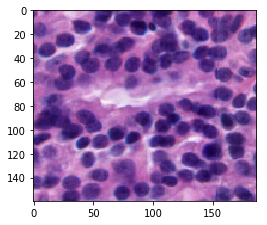

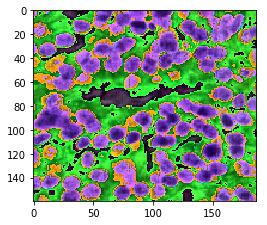

In [2]:
im = skimage.io.imread('datafiles/cropped.tif')
enhanced = skimage.exposure.adjust_log(im, 1.5)
enhanced = skimage.exposure.equalize_adapthist(enhanced)
plt.figure("Input", figsize=(4,4))
plt.imshow(im)
plt.figure("Enhanced", figsize=(4,4))
plt.imshow(enhanced)
print(enhanced.shape, enhanced.dtype)

# Convert image into feature vectors

Features (29920, 3)
[[ 0.53834375  0.35985545  0.        ]
 [ 0.79352227  0.50607287  1.        ]
 [ 0.86507937  0.56349206  1.        ]
 [ 1.          0.65882353  0.05882353]
 [ 0.12190142  0.66881049  0.08236582]]


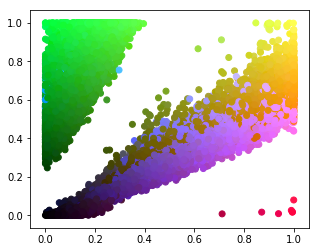

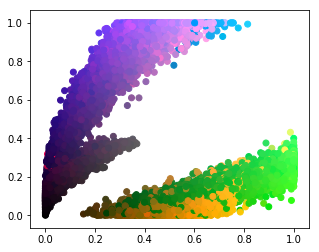

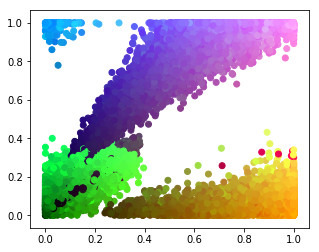

In [3]:
# features = im.reshape((-1, 4))[..., :3]
# colors = list(features/255)

features = enhanced.reshape((-1, 3))
features_copy = features.copy()
colors = list(features)

print('Features', features.shape)
print(features[:5])

plt.figure('RG', figsize=(5,4))
plt.scatter(features[:, 0], features[:, 1], c=colors)

plt.figure('GB', figsize=(5,4))
plt.scatter(features[:, 1], features[:, 2], c=colors)

plt.figure('RB', figsize=(5,4))
plt.scatter(features[:, 0], features[:, 2], c=colors)

# GNG clustering

   Pass #1
shrinking down
shrinking down
   Pass #2
shrinking down
   Pass #3
shrinking down
shrinking down
shrinking down
shrinking down
shrinking down
shrinking down
shrinking down
   Pass #4
shrinking down
shrinking down
shrinking down
shrinking down
shrinking down
shrinking down
Found 3 clusters.


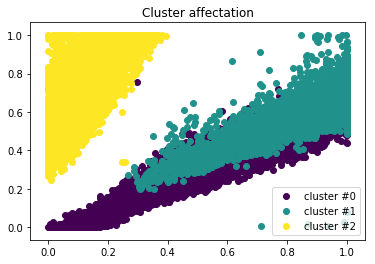

In [4]:
from neural_gas import vGNG

if os.path.exists('visualization/sequence'):
        shutil.rmtree('visualization/sequence')
os.makedirs('visualization/sequence')

gng = vGNG(features)
gng.fit(.06, .003, 10, 3000, .618, .995, 4, plot_evolution=True)
gng.update_clusters(outlier_tolerance = 2)
print('Found %d clusters.' % len(gng.clusters))
gng.plot_clusters()
# print('Clusters', gng.clusters)

# Image segmentation

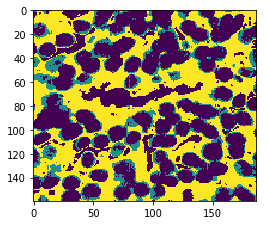

In [5]:
cluster_index = { unit: ci
    for ci, cluster in enumerate(gng._clusters) for unit in cluster}
labels = list()
for i, v in enumerate(features_copy):
    ranked_indices = np.argsort(np.linalg.norm(gng._network[0]-v[np.newaxis, ...], ord = 2, axis = 1))
    for j in ranked_indices:
        if j in cluster_index:
            labels.append(cluster_index[j])
            break
im_out = np.array(labels).reshape(im.shape[:2])
# print(im_out.shape)
plt.figure('Output', figsize=(4,4))
plt.imshow(im_out)